<a href="https://colab.research.google.com/github/ZeeshanKhalid2k01/Simio_DL/blob/main/Simio_DL_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Install Necessary Libraries

This step installs the required libraries for deep learning and data visualization. These libraries are essential for building and training machine learning models, as well as for visualizing results.

- `tensorflow`: This is a popular library for deep learning and building neural networks. It includes all the necessary tools to create, train, and evaluate deep learning models.
- `matplotlib`: This is a plotting library used for creating static, animated, and interactive visualizations in Python. It is used here to visualize data and model results.
- `seaborn`: This is a data visualization library based on `matplotlib`, which provides a high-level interface for drawing attractive and informative statistical graphics. It is used to create more complex plots, such as heatmaps and distribution plots.

**Why is this step necessary?**

We need these libraries to build and train a neural network model using TensorFlow, as well as to visualize the results and understand the patterns in the data.


In [1]:
# Install necessary libraries for deep learning and visualization
!pip install tensorflow matplotlib seaborn


### Step 2: Import Required Libraries

This step imports the necessary libraries for data manipulation, machine learning, and deep learning tasks.

- `pandas`: A powerful library used for data manipulation and analysis. It is essential for loading and processing the dataset in tabular form (i.e., DataFrames).
- `numpy`: A library for numerical operations in Python. It is used for working with arrays and performing mathematical operations.
- `matplotlib.pyplot`: A library for creating visualizations such as line plots, histograms, and bar charts. We will use this to visualize the data and the results of the model.
- `seaborn`: Built on top of `matplotlib`, Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It will be used for advanced plotting, such as heatmaps.
- `sklearn.model_selection.train_test_split`: This function splits the dataset into training and testing sets. It is a key part of machine learning workflows to validate the model's performance on unseen data.
- `sklearn.preprocessing.StandardScaler`: This is used for scaling numerical data. Scaling ensures that the features have a standard distribution, which helps the model learn better and faster.
- `sklearn.preprocessing.LabelEncoder`: A tool used to convert categorical labels (such as class names) into numerical values, which can be used by machine learning algorithms.
- `sklearn.metrics.confusion_matrix` and `accuracy_score`: These are used to evaluate the model's performance. The confusion matrix shows how well the model is performing across different classes, and accuracy score calculates the overall accuracy.
- `tensorflow.keras.models.Sequential`: A class for creating a neural network model in a linear stack of layers.
- `tensorflow.keras.layers.Dense` and `tensorflow.keras.layers.Dropout`: Layers for the neural network. `Dense` layers are fully connected layers, while `Dropout` is used to prevent overfitting by randomly setting a fraction of input units to zero during training.
- `tensorflow.keras.callbacks.EarlyStopping`: This callback helps prevent overfitting by stopping the training process early when the model's performance on the validation set stops improving.
- `tensorflow.keras.utils.to_categorical`: This function is used to convert labels into one-hot encoded vectors, which is a common format for multi-class classification tasks.

**Why is this step necessary?**

These libraries provide all the necessary tools for data processing, model building, training, and evaluation. They are critical for developing a robust machine learning or deep learning pipeline.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


### Step 3: Load the Dataset

In this step, we load the dataset from a CSV file into a pandas DataFrame for further processing.

- `file_path = '/content/SIMIO_3_DEC.csv'`: This line specifies the file path of the dataset that is stored as a CSV file. It is important to ensure that the path is correct and accessible for reading the data.
  
- `data = pd.read_csv(file_path)`: This uses pandas' `read_csv()` function to read the CSV file and store it as a DataFrame named `data`. The DataFrame is a tabular data structure that is easy to manipulate and analyze.

- `data.head()`: The `head()` function is used to display the first few rows of the dataset. This is a useful way to verify that the dataset has been loaded correctly and to inspect its structure (columns, types, etc.).

**Why is this step necessary?**

Loading the dataset is the first step in any data science or machine learning workflow. It allows us to begin exploring the data, checking for issues like missing values, and understanding its structure so we can prepare it for model training.


In [6]:
# Load the dataset
file_path = '/content/SIMIO_3_DEC.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset to confirm
data.head()


,Resource Id,Resource,Owner Id,Owner,Task Id,StartTime,EndTime,Duration (Minutes),NIS,Th_Put,...,server4_CapAlloc,server5_CapAlloc,server6_CapAlloc,Server1_utilization,Server2_utilization,Server3_utilization,Server4_utilization,Server5_utilization,Server6_utilization,Crieria
0,Server3,Server3,PartC.27,PartC.27,0,24-10-2024 0:00,24-10-2024 0:00,3.743000,0.0,0.0,...,0.0,0.0,0.0,0.0,13.624714,16.568087,0.000000,0.0,0.0,NaN
1,Server2,Server2,PartB.28,PartB.28,0,24-10-2024 0:00,24-10-2024 0:00,3.354933,0.0,0.0,...,0.0,0.0,0.0,0.0,12.862753,16.357954,0.000000,0.0,0.0,NaN
2,Server2,Server2,PartB.29,PartB.29,0,24-10-2024 0:00,24-10-2024 0:01,3.882300,0.0,0.0,...,1.0,0.0,0.0,0.0,25.795038,17.297581,7.638051,0.0,0.0,NaN
3,Server2,Server2,PartB.30,PartB.30,0,24-10-2024 0:00,24-10-2024 0:01,3.880883,0.0,0.0,...,2.0,0.0,0.0,0.0,27.594926,19.319545,10.535700,0.0,0.0,NaN
4,Server3,Server3,PartC.31,PartC.31,0,24-10-2024 0:00,24-10-2024 0:02,4.138617,0.0,0.0,...,3.0,0.0,0.0,0.0,26.404690,22.560475,17.273106,0.0,0.0,NaN


### Step 4: Handle Missing Values and Visualize Class Distribution

In this step, we handle missing values in the dataset and visualize the class distribution for the `Crieria` column.

1. **Handle Missing Values**:
   - `data['Crieria'].fillna('Missing', inplace=True)`: This line replaces any `NaN` values in the `Crieria` column with the string `'Missing'`. This is useful for identifying and handling missing data, and the placeholder value ensures the dataset remains consistent for analysis and modeling.

2. **Class Distribution**:
   - `class_counts = data['Crieria'].value_counts()`: This line counts the number of occurrences of each unique class in the `Crieria` column, including the newly added `"Missing"` class for rows with missing values.
   
3. **Plotting the Distribution**:
   - `plt.figure(figsize=(8, 6))`: This sets the size of the plot for better visibility.
   - `class_counts.plot(kind='bar', color='skyblue')`: This creates a bar chart of the class distribution using the `class_counts` data. The bars represent the number of instances for each class, and the color is set to `skyblue` for better aesthetics.
   - `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: These lines set the title and labels for the x and y axes to make the plot more informative.
   - `plt.xticks(rotation=45, ha='right')`: This rotates the x-axis labels for better readability, especially when class names are long.
   - `plt.tight_layout()`: This adjusts the plot layout to ensure the elements fit within the figure area.

4. **Displaying the Plot**:
   - `plt.show()`: This line displays the plot, allowing us to visually inspect the distribution of the classes, including the `Missing` category.

5. **Print the Class Distribution** (Optional):
   - `print(class_counts)`: This prints the count of instances for each class to the console, providing a textual view of the distribution.

**Why is this step necessary?**

- **Handling Missing Values**: Missing values in the dataset can cause issues during analysis and modeling. By replacing `NaN` values with a label like `'Missing'`, we can identify and treat them properly.
- **Visualizing Class Distribution**: Understanding the distribution of classes is crucial for detecting imbalances in the dataset. If one class is significantly more frequent than others, this can affect the performance of machine learning models, especially for classification tasks. The bar chart helps to quickly visualize this imbalance.


<ipython-input-30-48c671e159a1>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Crieria'].fillna('Missing', inplace=True)


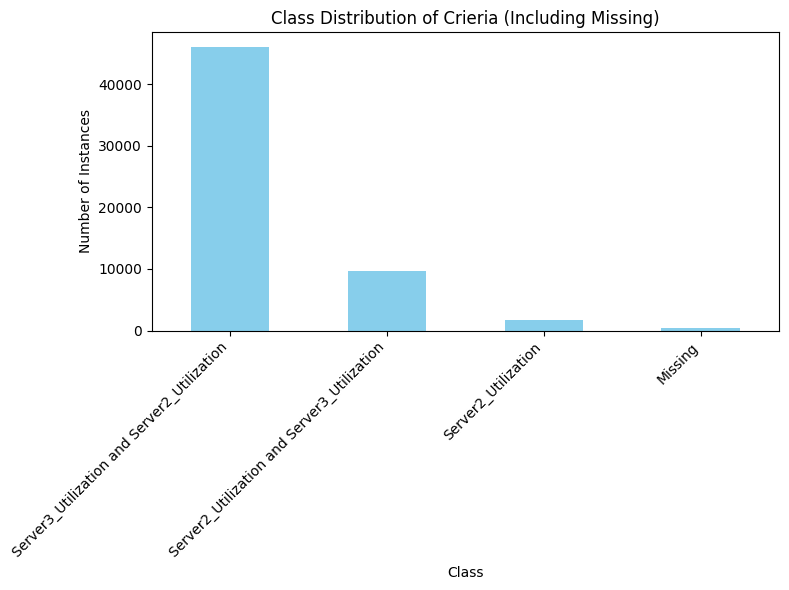

Crieria
Server3_Utilization and Server2_Utilization    46101
Server2_Utilization and Server3_Utilization     9671
Server2_Utilization                             1651
Missing                                          413
Name: count, dtype: int64


In [30]:
 qimport pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
data = pd.read_csv('/content/SIMIO_3_DEC.csv')

# Replace NaN values in the 'Crieria' column with 'Missing' or 'No Class'
data['Crieria'].fillna('Missing', inplace=True)

# Plot the class distribution for the 'Crieria' column
class_counts = data['Crieria'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Crieria (Including Missing)')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, print the class distribution to see the counts
print(class_counts)


### Step 5: Handle Missing Values in Specific Columns

In this step, we handle missing values in the dataset by replacing them with appropriate values for different columns.

1. **Handle Missing Values in 'Crieria' Column**:
   - `data['Crieria'].fillna('no bottleneck', inplace=True)`: This line replaces any missing (`NaN`) values in the `Crieria` column with the string `'no bottleneck'`. This placeholder helps ensure that the `Crieria` column has valid data for all rows, even if the original values were missing. It also signifies a class label used to handle missing data in this column.

2. **Handle Missing Values in Other Columns**:
   - `data.fillna(-0.1, inplace=True)`: This line replaces all other missing (`NaN`) values in the dataset with `-0.1`. This is useful for columns where missing values need to be handled numerically, especially for features that will be used in machine learning models. Replacing `NaN` with `-0.1` allows us to handle the missing data consistently while avoiding issues during model training and evaluation.

**Why is this step necessary?**

- **Handling Missing Values**: Missing data can negatively affect machine learning models, leading to errors or biased results. By replacing missing values with placeholders or suitable values, we ensure that the dataset is complete and consistent.
- **Using Placeholders**: Filling `NaN` values with specific labels (like `'no bottleneck'` for the `Crieria` column) helps to indicate a meaningful default or imputed value that can be used by the model, rather than leaving them as missing values.
- **Consistency Across Columns**: Replacing missing values with `-0.1` in other columns ensures that all missing values are treated consistently and in a way that does not interfere with numerical operations or model training.


In [7]:
# Fill missing values in 'Crieria' column with 'no bottleneck'
data['Crieria'].fillna('no bottleneck', inplace=True)

# Replace NaN values in other columns with -0.1
data.fillna(-0.1, inplace=True)


<ipython-input-7-a86c15c765fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Crieria'].fillna('no bottleneck', inplace=True)


### Step 6: Label Encoding and Saving Class Mappings

In this step, we encode the target variable (the `Crieria` column) into numerical values and save the label-to-class mapping for future reference.

1. **Label Encoding the Target Variable**:
   - `label_encoder = LabelEncoder()`: This line creates an instance of `LabelEncoder` from `sklearn`. The `LabelEncoder` is used to convert categorical labels (like class names) into numerical values, which are easier for machine learning algorithms to process.
   - `data['Crieria'] = label_encoder.fit_transform(data['Crieria'])`: This line applies label encoding to the `Crieria` column. It converts each unique class label into a unique integer value. The `fit_transform()` method fits the encoder on the `Crieria` column (i.e., learns the unique classes) and then transforms the class labels into numerical values.

2. **Save the Label-to-Class Mapping**:
   - `class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))`: This creates a dictionary that maps the numerical labels back to the class names. `label_encoder.classes_` gives the list of class names, and `label_encoder.transform()` converts those names into their corresponding numerical values.
   - `with open('/content/class_mapping.txt', 'w') as file:`: This opens a text file (`class_mapping.txt`) in write mode to save the mapping.
   - `for label, class_name in class_mapping.items():`: This iterates through the class mapping dictionary, writing each label and its corresponding class name to the text file in the format `label: class_name`.

3. **Show the Mapping**:
   - `class_mapping`: This line displays the label-to-class mapping, which allows us to see the encoding that was applied to the `Crieria` column.

**Why is this step necessary?**

- **Label Encoding**: Machine learning models require numerical data. By converting the categorical class labels into numerical values, we make the `Crieria` column suitable for training the model.
- **Saving the Mapping**: Saving the label-to-class mapping is important because it allows us to map back the predicted numerical labels to the original class names later. This ensures that we can interpret the model's predictions.
- **Reproducibility**: By storing the mapping, we can easily load it later (during testing or for future analysis) to decode the model's predictions back into human-readable class names.


In [8]:

# Label encode the target variable 'Crieria'
label_encoder = LabelEncoder()
data['Crieria'] = label_encoder.fit_transform(data['Crieria'])

# Save the label-to-class mapping to a text file
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
with open('/content/class_mapping.txt', 'w') as file:
    for label, class_name in class_mapping.items():
        file.write(f"{label}: {class_name}\n")

# Show the mapping for reference
class_mapping


{'Server2_Utilization': 0,
 'Server2_Utilization and Server3_Utilization': 1,
 'Server3_Utilization and Server2_Utilization': 2,
 'no bottleneck': 3}

### Step 7: Create and Save Column Mappings

In this step, we create mappings for each column in the dataset (except the target column `Crieria`), converting categorical values to numerical labels. These mappings are saved in a JSON file for future reference.

1. **Create a Dictionary for Column Mappings**:
   - `column_mappings = {}`: An empty dictionary is initialized to store the mappings for each column.
   
2. **Loop Through Each Column and Create Mappings**:
   - `for column in data.columns:`: This loop iterates over all the columns in the dataset.
   - `if column != 'Crieria':`: This conditional ensures that the `Crieria` column, which is the target variable, is excluded from the mapping process.
   - `unique_values = data[column].unique()`: For each column, we get the unique values, which are the distinct categorical labels or entries in that column.
   - `value_to_label = {str(value): idx for idx, value in enumerate(unique_values)}`: A dictionary is created that maps each unique value in the column to an integer. The values are converted to strings to ensure that any type (e.g., integers, strings) is handled uniformly.
   
3. **Save the Mapping in the Dictionary**:
   - `column_mappings[column] = value_to_label`: The mapping for each column is stored in the `column_mappings` dictionary. The column name is the key, and the mapping dictionary is the value.

4. **Save the Column Mappings to a JSON File**:
   - `with open('/content/column_mappings.json', 'w') as json_file:`: This opens a file named `column_mappings.json` in write mode to save the mappings.
   - `json.dump(column_mappings, json_file, indent=4)`: The `column_mappings` dictionary is written to the JSON file. The `indent=4` parameter ensures that the output is nicely formatted with an indentation of 4 spaces.

5. **Show the Mappings**:
   - `column_mappings`: This line displays the dictionary of column mappings for reference, so you can see the mappings that have been created for each column.

**Why is this step necessary?**

- **Column Mappings**: Machine learning models typically require numerical data. By converting categorical values (such as text labels) into numeric labels, we make the dataset suitable for training. This mapping helps transform the data into a format that the model can understand.
- **Saving the Mappings**: Storing the mappings in a JSON file allows you to reference the encoding later during testing or model inference. This ensures consistency when encoding or decoding data.
- **Reproducibility**: Saving the mappings allows the entire pipeline (including data preprocessing) to be reproduced consistently in the future.


In [14]:
import json

# Create a dictionary to store the mapping for each column
column_mappings = {}

# Loop through each column and create a mapping (except the target column 'Crieria')
for column in data.columns:
    if column != 'Crieria':  # Skip the target column
        # Get unique values in the column
        unique_values = data[column].unique()

        # Create a mapping of value to label (integer)
        value_to_label = {str(value): idx for idx, value in enumerate(unique_values)}  # Convert values to string

        # Save the mapping in the dictionary
        column_mappings[column] = value_to_label

# Save the column mappings to a JSON file
with open('/content/column_mappings.json', 'w') as json_file:
    json.dump(column_mappings, json_file, indent=4)

# Show the mappings for reference
column_mappings


{'Resource Id': {'Server3': 0,
  'Server2': 1,
  'Server4': 2,
  'Server1': 3,
  'Server6': 4,
  'Server5': 5},
 'Resource': {'Server3': 0,
  'Server2': 1,
  'Server4': 2,
  'Server1': 3,
  'Server6': 4,
  'Server5': 5},
 'Owner Id': {'PartC.27': 0,
  'PartB.28': 1,
  'PartB.29': 2,
  'PartB.30': 3,
  'PartC.31': 4,
  'PartC.32': 5,
  'PartA.33': 6,
  'PartA.34': 7,
  'PartA.35': 8,
  'PartC.36': 9,
  'PartB.37': 10,
  'PartA.38': 11,
  'PartC.39': 12,
  'PartC.40': 13,
  'PartB.42': 14,
  'PartC.41': 15,
  'PartB.43': 16,
  'PartB.45': 17,
  'PartA.46': 18,
  'PartB.49': 19,
  'PartC.44': 20,
  'PartB.51': 21,
  'PartA.52': 22,
  'PartA.54': 23,
  'PartB.53': 24,
  'PartB.55': 25,
  'PartC.47': 26,
  'PartC.48': 27,
  'PartB.57': 28,
  'PartC.50': 29,
  'PartC.56': 30,
  'PartC.59': 31,
  'PartC.61': 32,
  'PartC.64': 33,
  'PartB.63': 34,
  'PartA.58': 35,
  'PartA.60': 36,
  'PartB.67': 37,
  'PartB.68': 38,
  'PartC.65': 39,
  'PartB.69': 40,
  'PartB.70': 41,
  'PartC.71': 42,
  '

### Step 8: Load Column Mappings, Encode Features, and Scale the Data

In this step, we load the previously saved column mappings, encode the categorical features into numerical values, and scale the data to ensure it is ready for model training.

1. **Load the Column Mappings**:
   - `with open('/content/column_mappings.json', 'r') as json_file:`: This opens the previously saved `column_mappings.json` file, which contains the mappings from categorical values to numerical labels for each feature column.
   - `column_mappings = json.load(json_file)`: The JSON file is loaded into a Python dictionary, `column_mappings`, that maps each column's unique values to numerical labels.

2. **Encode the Features**:
   - `def encode_features(data, column_mappings):`: This function encodes the feature columns (except the target column `Crieria`) based on the saved mappings.
     - The function iterates through each column in the dataset (skipping `Crieria`), and for each feature column, it maps the original values to their corresponding numerical labels using the `column_mappings` dictionary.
     - `encoded_data[column] = encoded_data[column].map(column_mappings[column]).fillna(-0.1)`: The `.map()` function applies the mappings to the column, converting categorical values to integers. Missing values (NaNs) are replaced with `-0.1`, a placeholder indicating unknown or missing data.
   
3. **Encode the Training and Testing Data**:
   - `X_train_encoded = encode_features(X_train, column_mappings)`: This applies the encoding function to the training dataset (`X_train`).
   - `X_test_encoded = encode_features(X_test, column_mappings)`: Similarly, this encodes the features in the testing dataset (`X_test`).

4. **Scale the Data**:
   - `scaler = StandardScaler()`: This initializes a `StandardScaler` object to standardize the features by removing the mean and scaling to unit variance. Scaling is important for many machine learning algorithms to perform optimally.
   - `X_train_scaled = scaler.fit_transform(X_train_encoded)`: This scales the training data. The `fit_transform()` method calculates the mean and standard deviation of the training data and applies the scaling.
   - `X_test_scaled = scaler.transform(X_test_encoded)`: This scales the testing data using the same scaling parameters (mean and standard deviation) derived from the training data.

**Why is this step necessary?**

- **Loading Column Mappings**: The column mappings are crucial to ensure that categorical variables are consistently encoded into numerical values that the machine learning model can process.
- **Encoding Features**: This step converts the categorical data into a format that is understandable by machine learning models. Without encoding, the model cannot work with textual or categorical features.
- **Scaling the Data**: Scaling ensures that all features are on the same scale, preventing certain features from dominating others during training. This is especially important for models like neural networks and distance-based algorithms (e.g., K-Nearest Neighbors).


In [15]:
# Load the column mappings from the JSON file
with open('/content/column_mappings.json', 'r') as json_file:
    column_mappings = json.load(json_file)

# Function to encode features based on the saved mappings
def encode_features(data, column_mappings):
    encoded_data = data.copy()

    for column in data.columns:
        if column != 'Crieria':  # Skip the target column
            # Map the values in the column to the corresponding label
            encoded_data[column] = encoded_data[column].map(column_mappings[column]).fillna(-0.1)  # Use -0.1 for unknown values

    return encoded_data

# Encode the features for training and testing datasets
X_train_encoded = encode_features(X_train, column_mappings)
X_test_encoded = encode_features(X_test, column_mappings)

# Ensure the data is scaled after encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


### Step 9: Build, Compile, and Train the Neural Network Model

In this step, we build a neural network model using TensorFlow's Keras API, compile the model with an appropriate loss function and optimizer, and train the model with early stopping to prevent overfitting.

1. **Build the Neural Network Model**:
   - `model = Sequential([ ... ])`: This creates a Sequential model, which is a linear stack of layers in Keras. Each layer will have a specific function and will pass data to the next layer in the stack.
   
     - `Dense(128, input_dim=X_train_scaled.shape[1], activation='relu')`: This is the first hidden layer with 128 neurons. It uses the ReLU (Rectified Linear Unit) activation function, which is widely used in deep learning to introduce non-linearity. `input_dim=X_train_scaled.shape[1]` specifies the number of input features (i.e., the number of columns in the scaled training data).
     - `Dropout(0.2)`: This layer randomly sets 20% of the neurons to zero during training, which helps prevent overfitting by forcing the model to generalize better.
     - `Dense(64, activation='relu')`: The second hidden layer with 64 neurons and ReLU activation.
     - `Dropout(0.2)`: Another dropout layer to prevent overfitting.
     - `Dense(32, activation='relu')`: The third hidden layer with 32 neurons and ReLU activation.
     - `Dense(len(label_encoder.classes_), activation='softmax')`: The output layer with a number of neurons equal to the number of classes in the target variable (`Crieria`). The `softmax` activation function is used for multi-class classification problems because it outputs probabilities for each class, and the class with the highest probability is considered the predicted class.

2. **Compile the Model**:
   - `model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])`: This compiles the model:
     - `loss='sparse_categorical_crossentropy'`: This is the loss function used for multi-class classification problems where labels are integers. It measures how well the predicted probabilities match the true labels.
     - `optimizer='adam'`: Adam is an adaptive optimizer that adjusts the learning rate based on the gradients, making it efficient for training deep learning models.
     - `metrics=['accuracy']`: This specifies that accuracy will be monitored during training.

3. **Early Stopping Callback**:
   - `early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)`: This creates an early stopping callback to prevent overfitting. If the validation loss does not improve for 5 consecutive epochs (`patience=5`), training will stop early. The `restore_best_weights=True` argument ensures that the model reverts to the best weights observed during training.

4. **Train the Model**:
   - `history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)`: This trains the model on the scaled training data (`X_train_scaled` and `y_train`), using the following settings:
     - `epochs=100`: The maximum number of epochs to train the model.
     - `batch_size=32`: The number of samples to use in each batch during training.
     - `validation_data=(X_test_scaled, y_test)`: The validation data is provided to evaluate the model's performance during training.
     - `callbacks=[early_stopping]`: The early stopping callback is used during training to stop early if the validation loss doesn't improve.
     - `verbose=1`: This controls the verbosity of the training process, with `1` showing progress during training.

**Why is this step necessary?**

- **Building the Neural Network**: The neural network model defines the structure of the model, including the number of layers, the number of neurons in each layer, and the activation functions. This determines how the model learns and makes predictions.
- **Compiling the Model**: Compiling the model sets the loss function, optimizer, and metrics. These determine how the model will be trained and how its performance will be evaluated.
- **Early Stopping**: Early stopping helps prevent overfitting by monitoring the validation loss and stopping the training when the model's performance on the validation data stops improving.
- **Training the Model**: Training the model on the dataset is where the model learns from the data. By specifying the number of epochs, batch size, and validation data, we control how the model is trained and validated.

This step is crucial for creating and training a machine learning model, ensuring it learns from the data while avoiding overfitting and providing evaluation metrics.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network model
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping], verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1446/1446 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8930 - loss: 0.3130 - val_accuracy: 0.9849 - val_loss: 0.0557
Epoch 2/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9679 - loss: 0.0811 - val_accuracy: 0.9759 - val_loss: 0.0492
Epoch 3/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0627 - val_accuracy: 0.9803 - val_loss: 0.0407
Epoch 4/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0551 - val_accuracy: 0.9823 - val_loss: 0.0393
Epoch 5/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9778 - loss: 0.0534 - val_accuracy: 0.9837 - val_loss: 0.0368
Epoch 6/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9779 - loss: 0.0517 - val_accuracy: 0.9857 - val_loss: 0.0332
Epoch 7/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9763 - loss: 0.0543 - val_accuracy: 0.9884 - val_loss: 0.0289
Epoch 8/100
1446/1446 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0451 - val_

### Step 10: Evaluate the Model Performance Using Accuracy and Confusion Matrix

In this step, we evaluate the model’s performance by calculating its accuracy and generating a confusion matrix.

1. **Make Predictions on the Test Set**:
   - `y_pred = model.predict(X_test_scaled)`: This line uses the trained model to make predictions on the scaled test data (`X_test_scaled`). The output (`y_pred`) is the predicted probabilities for each class.
   - `y_pred_labels = np.argmax(y_pred, axis=1)`: Since the model outputs probabilities for each class, we use `np.argmax()` to select the class with the highest probability for each prediction. This gives us the predicted class labels.

2. **Calculate Accuracy**:
   - `accuracy = accuracy_score(y_test, y_pred_labels)`: This calculates the accuracy of the model by comparing the true class labels (`y_test`) with the predicted class labels (`y_pred_labels`). The `accuracy_score()` function from `sklearn` calculates the proportion of correct predictions.
   - `print(f"Accuracy: {accuracy * 100:.2f}%")`: This prints the accuracy as a percentage, showing how well the model performed on the test set.

3. **Generate the Confusion Matrix**:
   - `cm = confusion_matrix(y_test, y_pred_labels)`: The `confusion_matrix()` function calculates the confusion matrix, which shows the true vs predicted classifications. The confusion matrix allows us to see how many times the model predicted each class correctly and incorrectly.
   
4. **Plot the Confusion Matrix**:
   - `plt.figure(figsize=(10, 7))`: This line sets the figure size for the plot.
   - `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)`: This creates a heatmap of the confusion matrix using Seaborn. The `annot=True` option adds the numerical values to the cells, and `fmt='d'` ensures that the values are displayed as integers. The `xticklabels` and `yticklabels` are set to the class names using the `label_encoder`.
   - `plt.xlabel('Predicted')` and `plt.ylabel('True')`: These lines label the x-axis and y-axis of the plot to indicate that the x-axis represents predicted labels and the y-axis represents true labels.
   - `plt.title('Confusion Matrix')`: This sets the title of the plot.
   - `plt.show()`: This displays the confusion matrix plot.

**Why is this step necessary?**

- **Model Accuracy**: Accuracy is a simple and common metric used to evaluate the performance of classification models. It tells us what percentage of the model's predictions were correct.
- **Confusion Matrix**: The confusion matrix is a powerful tool to understand how well the model is performing across different classes. It provides insight into the types of errors the model is making (e.g., confusing one class with another).
- **Visualizing Performance**: The heatmap of the confusion matrix visually represents the model's performance, allowing us to easily identify which classes are being predicted correctly and which are being confused with others.

This step is essential for assessing the effectiveness of the trained model and understanding areas where it can be improved.


362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 99.09%


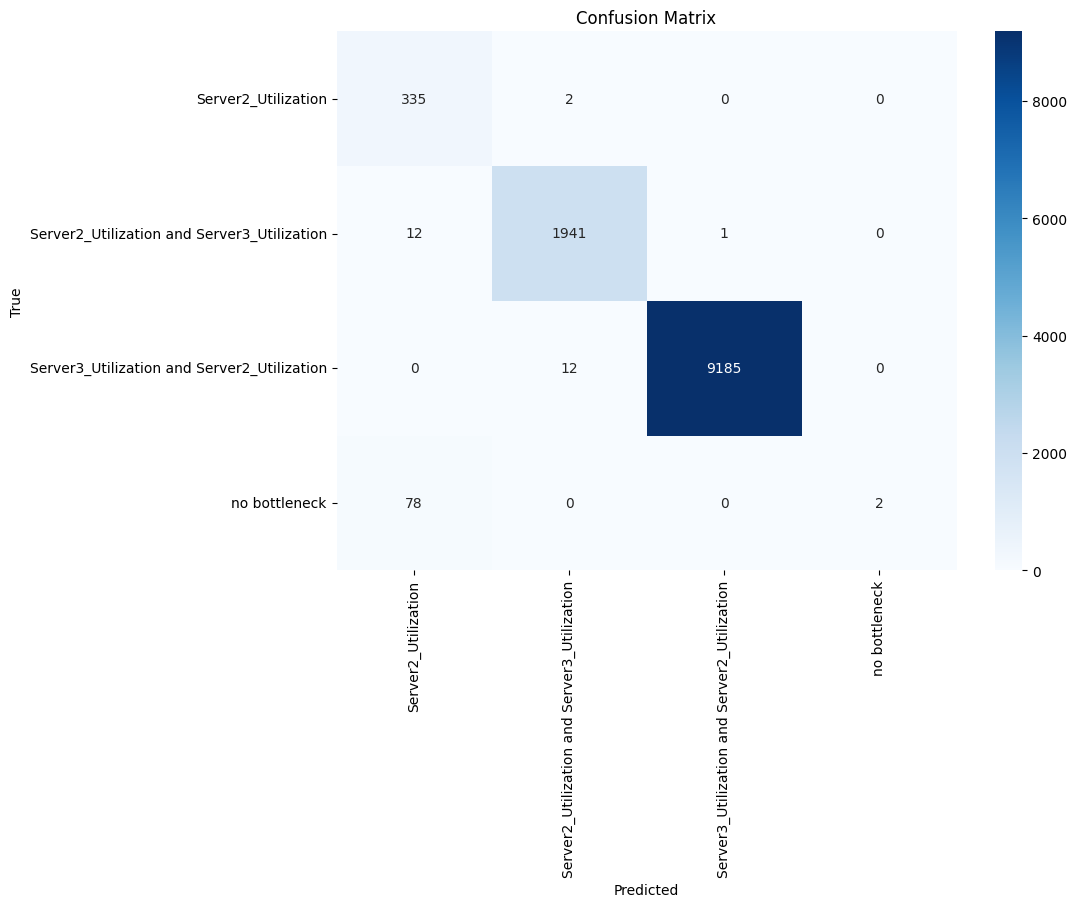

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Step 11: Save the Trained Model, Scaler, Label Encoder, and Column Mappings

In this step, we save the trained model, scaler, label encoder, and column mappings to files so they can be reloaded and used later for inference or further analysis.

1. **Save the Trained Model**:
   - `model.save('/content/trained_model.h5')`: This saves the trained neural network model to a file (`trained_model.h5`). The `.h5` format is commonly used to store Keras models and allows us to easily load the model later without retraining. This is especially useful for deploying the model for inference or when you want to resume training at a later time.

2. **Save the Scaler**:
   - `import joblib`: `joblib` is a library used for serializing Python objects, and it is especially efficient for storing large objects like the scaler.
   - `joblib.dump(scaler, '/content/scaler.pkl')`: This saves the scaler (`StandardScaler`) used for feature scaling during training. The scaler stores the mean and standard deviation calculated from the training data, and we use it to transform the test data in the same way. Saving it ensures that we can scale future data in the same manner.

3. **Save the Label Encoder**:
   - `joblib.dump(label_encoder, '/content/label_encoder.pkl')`: The label encoder is saved to a file. The encoder was used to convert categorical class labels into numerical labels, and saving it allows us to decode the model's predictions back into human-readable class names when we use the model for inference.

4. **Save the Column Mappings**:
   - `with open('/content/column_mappings.json', 'w') as json_file:`: This opens the `column_mappings.json` file in write mode.
   - `json.dump(column_mappings, json_file, indent=4)`: This saves the column mappings to a JSON file. The column mappings are essential for encoding the features consistently, and saving them ensures that we can use the same encoding strategy when applying the model to new data in the future.

**Why is this step necessary?**

- **Saving the Model**: By saving the trained model, we avoid having to retrain it every time we need to use it. This is especially important when deploying the model for production use.
- **Saving the Scaler and Label Encoder**: Saving the scaler and label encoder ensures that the preprocessing steps (scaling and label encoding) are applied consistently to new data when making predictions. Without these, the model would not perform correctly on new, unseen data.
- **Saving the Column Mappings**: The column mappings are essential for encoding the features in the same way as during training. Storing them ensures that new data is processed consistently, which is crucial for the model to make accurate predictions.

This step ensures that all components necessary for the model to function are stored and can be easily reloaded for future use, making the model deployment process seamless.


In [18]:
# Save the trained model
model.save('/content/trained_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, '/content/scaler.pkl')

# Save the label encoder for decoding the target variable
joblib.dump(label_encoder, '/content/label_encoder.pkl')

# Save the column mappings (this has already been done, but to recap):
with open('/content/column_mappings.json', 'w') as json_file:
    json.dump(column_mappings, json_file, indent=4)


### Step 12: Plot Training and Validation Accuracy and Loss

In this step, we plot the training and validation accuracy and loss to visually analyze the model’s performance during training and check for potential overfitting.

1. **Plot Training and Validation Accuracy**:
   - `plt.plot(history.history['accuracy'], label='Train Accuracy')`: This line plots the training accuracy over the epochs. `history.history['accuracy']` contains the accuracy values recorded at the end of each training epoch.
   - `plt.plot(history.history['val_accuracy'], label='Validation Accuracy')`: Similarly, this line plots the validation accuracy over the epochs. `history.history['val_accuracy']` contains the accuracy values recorded on the validation dataset during training.
   - `plt.xlabel('Epochs')`: This sets the x-axis label to "Epochs", which represents the number of training iterations.
   - `plt.ylabel('Accuracy')`: This sets the y-axis label to "Accuracy" to indicate what the plot is measuring.
   - `plt.legend()`: This adds a legend to the plot to differentiate between training and validation accuracy.
   - `plt.title('Model Accuracy')`: This sets the title of the plot to "Model Accuracy", providing context for the viewer.
   - `plt.show()`: This displays the plot to visualize the training and validation accuracy.

2. **Plot Training and Validation Loss**:
   - `plt.plot(history.history['loss'], label='Train Loss')`: This line plots the training loss over the epochs. The `history.history['loss']` contains the loss values computed at the end of each training epoch.
   - `plt.plot(history.history['val_loss'], label='Validation Loss')`: This line plots the validation loss over the epochs. The `history.history['val_loss']` contains the loss values computed for the validation dataset.
   - `plt.xlabel('Epochs')`: This sets the x-axis label to "Epochs".
   - `plt.ylabel('Loss')`: This sets the y-axis label to "Loss" to indicate that the plot is measuring the loss values.
   - `plt.legend()`: This adds a legend to the plot to distinguish between training and validation loss.
   - `plt.title('Model Loss')`: This sets the title of the plot to "Model Loss".
   - `plt.show()`: This displays the plot to visualize the training and validation loss.

**Why is this step necessary?**

- **Visualizing Accuracy and Loss**: Plotting training and validation accuracy and loss is a great way to monitor the model’s performance during training. These plots allow you to:
  - **Track improvement**: You can see if the model is learning and improving over time by examining how the accuracy increases and the loss decreases.
  - **Identify overfitting**: If the training accuracy continues to improve while the validation accuracy stagnates or decreases, it could indicate that the model is overfitting to the training data. Similarly, if the training loss decreases but the validation loss starts to increase, it’s another sign of overfitting.
  - **Fine-tune training**: These plots help in making decisions about whether to stop training early or adjust the model’s hyperparameters.

This step is essential for understanding the learning process and evaluating whether the model is generalizing well or overfitting to the training data.


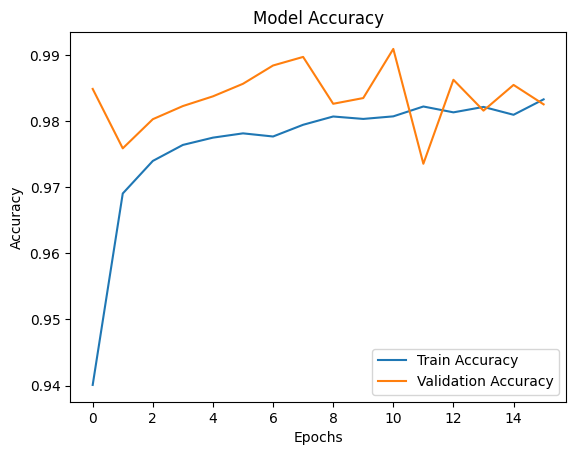

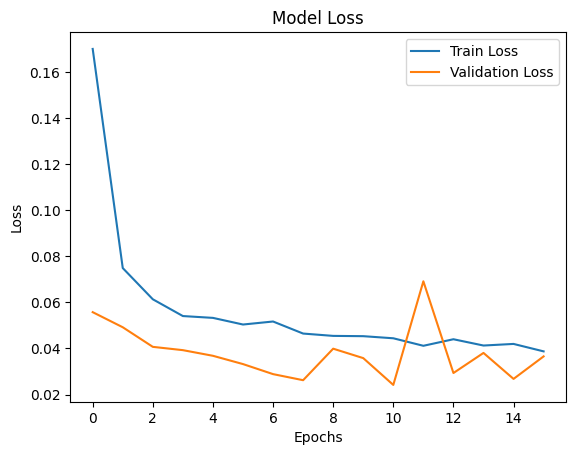

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


### Step 13: Make Predictions on a Sample Dataset and Display Results

In this step, we use the trained model to make predictions on a sample of rows from the dataset, ensuring that the model's predictions align with the actual class labels. We then print the actual and predicted class labels for each row.

1. **Load the Trained Model, Scaler, and Label Encoder**:
   - `model = load_model('/content/trained_model.h5')`: This line loads the pre-trained model from the file `trained_model.h5`.
   - `scaler = joblib.load('/content/scaler.pkl')`: This loads the scaler used during training to ensure consistent scaling of data during prediction.
   - `label_encoder = joblib.load('/content/label_encoder.pkl')`: This loads the label encoder, which is used to convert numerical labels back to the original class names.

2. **Load and Preprocess the Dataset**:
   - `data = pd.read_csv('/content/SIMIO_3_DEC.csv')`: This loads the dataset into a DataFrame.
   - `data['Crieria'].fillna('no bottleneck', inplace=True)`: Missing values in the `Crieria` column are filled with the label `'no bottleneck'`.
   - `with open('/content/column_mappings.json', 'r') as json_file:`: The previously saved column mappings are loaded from the `column_mappings.json` file to ensure consistent encoding.

3. **Extract One Row Per Class**:
   - The code iterates over the unique classes in the `Crieria` column and selects one row for each class. This ensures that we test the model with representative samples from each class.

4. **Prepare the Data for Prediction**:
   - `encode_features`: This function applies the column mappings to convert categorical values in the feature columns into numerical labels.
   - `X_sample_encoded = encode_features(X_sample, column_mappings)`: The features of the sample dataset are encoded using the mappings.
   - `X_sample_scaled = scaler.transform(X_sample_encoded)`: The encoded sample data is scaled using the same scaler used during training.

5. **Make Predictions**:
   - `predictions = model.predict(X_sample_scaled)`: The model makes predictions on the scaled sample data.
   - `predicted_labels = np.argmax(predictions, axis=1)`: The model outputs probabilities for each class, and `np.argmax()` is used to get the predicted class label with the highest probability.
   - `predicted_class_names = label_encoder.inverse_transform(predicted_labels)`: The predicted numerical labels are decoded back into class names using the label encoder.

6. **Check Alignment of Predictions and Actual Data**:
   - The code verifies that the number of predictions matches the number of rows in the sample data.
   - If the lengths match, the actual and predicted class labels are printed for each row. Otherwise, an error message is displayed.

**Why is this step necessary?**

- **Making Predictions**: This step demonstrates how to use the trained model to make predictions on new data (in this case, a sample from the original dataset).
- **Ensuring Consistency**: By encoding the features and scaling them consistently with the training process, we ensure that the model’s predictions are accurate and meaningful.
- **Evaluating Predictions**: By comparing the predicted and actual labels, we can assess how well the model is performing on individual examples, which is crucial for understanding its strengths and weaknesses.


In [25]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load the model, scaler, and label encoder
model = load_model('/content/trained_model.h5')
scaler = joblib.load('/content/scaler.pkl')
label_encoder = joblib.load('/content/label_encoder.pkl')

# Load the dataset
data = pd.read_csv('/content/SIMIO_3_DEC.csv')

# Fill NaN values in 'Crieria' with 'no bottleneck'
data['Crieria'].fillna('no bottleneck', inplace=True)

# Load the column mappings from the saved JSON file
with open('/content/column_mappings.json', 'r') as json_file:
    column_mappings = json.load(json_file)

# Extract one row for each class from the 'Crieria' column
sample_rows = []

# Select one row for each unique class in 'Crieria'
for class_name in label_encoder.classes_:
    # Check if there are rows for the current class
    if class_name in data['Crieria'].values:
        sample_row = data[data['Crieria'] == class_name].sample(n=1, random_state=42)
        sample_rows.append(sample_row)

# If no rows are found for any class, raise a warning
if not sample_rows:
    print("Warning: No rows found for any class.")

# Combine the extracted rows into a single DataFrame
sample_data = pd.concat(sample_rows)

# Ensure that we do not have rows with NaN in 'Crieria'
sample_data = sample_data.dropna(subset=['Crieria'])

# Check the number of rows in sample_data
print(f"Number of rows in sample_data: {len(sample_data)}")

# Separate features (X) and target (y)
X_sample = sample_data.drop('Crieria', axis=1)
y_sample = sample_data['Crieria']

# Encode the features using the column mappings
def encode_features(data, column_mappings):
    encoded_data = data.copy()
    for column in data.columns:
        if column != 'Crieria':  # Skip the target column
            # Map the values in the column to the corresponding label
            encoded_data[column] = encoded_data[column].map(column_mappings[column]).fillna(-0.1)  # Use -0.1 for unknown values
    return encoded_data

# Encode the sample data for prediction
X_sample_encoded = encode_features(X_sample, column_mappings)

# Scale the sample data
X_sample_scaled = scaler.transform(X_sample_encoded)

# Predict using the model
predictions = model.predict(X_sample_scaled)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predictions back to class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Check the length of predictions and sample_data to ensure they align
print(f"Number of predictions: {len(predicted_class_names)}")
print(f"Number of rows in sample_data: {len(sample_data)}")

# Ensure the prediction length matches the number of rows
if len(predicted_class_names) == len(sample_data):
    # Print the actual and predicted classes for each sample row
    for i in range(len(sample_data)):
        row = sample_data.iloc[i]
        print(f"Class: {row['Crieria']}")
        print(f"Predicted: {predicted_class_names[i]}")
        print("=" * 50)
else:
    print("Error: The number of predictions does not match the number of rows in the sample data.")


<ipython-input-25-1aae714ebb35>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Crieria'].fillna('no bottleneck', inplace=True)


Number of rows in sample_data: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Number of predictions: 4
Number of rows in sample_data: 4
Class: Server2_Utilization
Predicted: Server2_Utilization
Class: Server2_Utilization and Server3_Utilization
Predicted: Server2_Utilization and Server3_Utilization
Class: Server3_Utilization and Server2_Utilization
Predicted: Server3_Utilization and Server2_Utilization
Class: no bottleneck
Predicted: Server2_Utilization


### Step 14: Make Predictions for the Entire Dataset and Save the Results

In this step, we make predictions for the entire dataset using the trained model, add the predictions as a new column, and save the updated dataset to a new CSV file.

1. **Load the Trained Model, Scaler, and Label Encoder**:
   - `model = load_model('/content/trained_model.h5')`: This loads the pre-trained model from the file `trained_model.h5`, which was saved earlier.
   - `scaler = joblib.load('/content/scaler.pkl')`: The scaler, used for standardizing the features during training, is loaded from the saved file.
   - `label_encoder = joblib.load('/content/label_encoder.pkl')`: The label encoder is loaded to decode the numerical predictions back to the original class labels.

2. **Load the Dataset**:
   - `data = pd.read_csv('/content/SIMIO_3_DEC.csv')`: The dataset is loaded from the CSV file `SIMIO_3_DEC.csv` into a pandas DataFrame.

3. **Handle Missing Values**:
   - `data['Crieria'].fillna('no bottleneck', inplace=True)`: Missing values in the `Crieria` column are filled with the label `'no bottleneck'`, ensuring that the model can handle rows with missing values.

4. **Load the Column Mappings**:
   - `with open('/content/column_mappings.json', 'r') as json_file:`: The previously saved column mappings are loaded from the `column_mappings.json` file to ensure that categorical features are consistently encoded.
   
5. **Encode the Features**:
   - The `encode_features()` function is used to encode the feature columns (excluding the target `Crieria` column) based on the saved column mappings. This converts categorical features into numerical labels suitable for model input.
   - `X_encoded = encode_features(data.drop('Crieria', axis=1), column_mappings)`: This applies the encoding to the dataset (excluding the target column).

6. **Scale the Data**:
   - `X_scaled = scaler.transform(X_encoded)`: The encoded features are scaled using the same scaler that was used during training. This ensures the features are standardized in the same way as during model training.

7. **Make Predictions**:
   - `predictions = model.predict(X_scaled)`: The model is used to make predictions on the scaled features.
   - `predicted_labels = np.argmax(predictions, axis=1)`: The model outputs probabilities for each class. The `np.argmax()` function selects the class with the highest probability for each row.
   - `predicted_class_names = label_encoder.inverse_transform(predicted_labels)`: The predicted numerical labels are converted back into the original class names using the label encoder.

8. **Add the Predictions as a New Column**:
   - `data['Predicted_Crieria'] = predicted_class_names`: A new column, `Predicted_Crieria`, is added to the DataFrame, containing the predicted class labels for each row.

9. **Save the Updated Dataset**:
   - `output_file_path = '/content/SIMIO_3_DEC_with_predictions.csv'`: This specifies the path where the updated dataset will be saved.
   - `data.to_csv(output_file_path, index=False)`: The DataFrame with the predictions is saved to a new CSV file. The `index=False` argument ensures that the row indices are not included in the output file.

**Why is this step necessary?**

- **Making Predictions on Entire Dataset**: This step allows us to apply the trained model to the entire dataset and obtain predictions for each row. It's crucial for generating predictions on all available data.
- **Storing Predictions**: Adding the predictions to the original dataset allows us to store the results for later analysis or use. This is useful for tasks like evaluating the model's performance or deploying the model in a production environment.
- **Saving the Results**: Saving the predictions in a new CSV file ensures that the results can be easily shared, reviewed, and used in further analysis.

This step completes the pipeline by making predictions for all data and ensuring that the results are saved for future use.


In [26]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load the model, scaler, and label encoder
model = load_model('/content/trained_model.h5')
scaler = joblib.load('/content/scaler.pkl')
label_encoder = joblib.load('/content/label_encoder.pkl')

# Load the dataset
data = pd.read_csv('/content/SIMIO_3_DEC.csv')

# Fill NaN values in 'Crieria' with 'no bottleneck'
data['Crieria'].fillna('no bottleneck', inplace=True)

# Load the column mappings from the saved JSON file
with open('/content/column_mappings.json', 'r') as json_file:
    column_mappings = json.load(json_file)

# Encode the features using the column mappings
def encode_features(data, column_mappings):
    encoded_data = data.copy()
    for column in data.columns:
        if column != 'Crieria':  # Skip the target column
            # Map the values in the column to the corresponding label
            encoded_data[column] = encoded_data[column].map(column_mappings[column]).fillna(-0.1)  # Use -0.1 for unknown values
    return encoded_data

# Encode the features for the entire dataset
X_encoded = encode_features(data.drop('Crieria', axis=1), column_mappings)

# Scale the dataset
X_scaled = scaler.transform(X_encoded)

# Predict using the model
predictions = model.predict(X_scaled)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predictions back to class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Add the predictions as a new column in the original dataframe
data['Predicted_Crieria'] = predicted_class_names

# Save the updated dataset to a new CSV file
output_file_path = '/content/SIMIO_3_DEC_with_predictions.csv'
data.to_csv(output_file_path, index=False)

print(f"Predictions added and saved to: {output_file_path}")


<ipython-input-26-9d08e9f2babd>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Crieria'].fillna('no bottleneck', inplace=True)


1808/1808 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Predictions added and saved to: /content/SIMIO_3_DEC_with_predictions.csv


### Step 15: Calculate the Accuracy of the Predictions

In this step, we evaluate the accuracy of the model's predictions by comparing the predicted values with the actual values from the dataset, and then calculate the accuracy percentage.

1. **Load the Dataset with Predictions**:
   - `data_with_predictions = pd.read_csv('/content/SIMIO_3_DEC_with_predictions.csv')`: This line loads the dataset that includes both the true values (`Crieria` column) and the predicted values (`Predicted_Crieria` column). The predictions were made in the previous steps and saved to this file.

2. **Compare Actual and Predicted Values**:
   - `correct_predictions = data_with_predictions['Crieria'] == data_with_predictions['Predicted_Crieria']`: This line compares the actual values (`Crieria`) with the predicted values (`Predicted_Crieria`). It returns a Boolean Series where `True` indicates a correct prediction and `False` indicates an incorrect prediction.

3. **Calculate Accuracy**:
   - `accuracy = correct_predictions.mean() * 100`: The accuracy is calculated by taking the mean of the `correct_predictions` Series. Since `True` is treated as `1` and `False` is treated as `0`, the mean gives the proportion of correct predictions. Multiplying by 100 converts this proportion into a percentage.

4. **Print the Accuracy Percentage**:
   - `print(f"Accuracy: {accuracy:.2f}%")`: This line prints the accuracy percentage, showing how well the model performed on the dataset. The `.2f` formats the output to display two decimal places.

**Why is this step necessary?**

- **Evaluating Model Performance**: Calculating the accuracy is a standard way to evaluate the performance of a classification model. It tells us how many predictions the model got correct compared to the total number of predictions.
- **Assessing Quality**: Accuracy helps assess the model’s generalization ability. A high accuracy indicates that the model has learned well, while a low accuracy suggests the need for further tuning or a different approach.

This step is crucial for understanding how well the model is performing on the dataset and whether the predictions align with the true values.


In [27]:
import pandas as pd

# Load the dataset with predictions
data_with_predictions = pd.read_csv('/content/SIMIO_3_DEC_with_predictions.csv')

# Compare actual and predicted values
correct_predictions = data_with_predictions['Crieria'] == data_with_predictions['Predicted_Crieria']

# Calculate the accuracy as the percentage of correct predictions
accuracy = correct_predictions.mean() * 100

# Print the accuracy percentage
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 99.02%


### Step 16: Identify and Display Incorrect Predictions

In this step, we identify the rows where the model made incorrect predictions and display those rows for further inspection.

1. **Load the Dataset with Predictions**:
   - `data_with_predictions = pd.read_csv('/content/SIMIO_3_DEC_with_predictions.csv')`: This line loads the dataset that includes both the true values (`Crieria`) and the predicted values (`Predicted_Crieria`) from the file `SIMIO_3_DEC_with_predictions.csv`.

2. **Filter Incorrect Predictions**:
   - `incorrect_predictions = data_with_predictions[data_with_predictions['Crieria'] != data_with_predictions['Predicted_Crieria']]`: This line filters the rows where the actual class (`Crieria`) does not match the predicted class (`Predicted_Crieria`). The condition `data_with_predictions['Crieria'] != data_with_predictions['Predicted_Crieria']` returns a Boolean mask, and the rows where this condition is `True` are stored in `incorrect_predictions`.

3. **Display Incorrect Predictions**:
   - `print(f"Incorrect predictions found: {len(incorrect_predictions)}")`: This prints the number of incorrect predictions found in the dataset. It gives an overview of how many predictions the model got wrong.
   - `print(incorrect_predictions)`: This prints the rows where the predictions were incorrect. These rows are displayed so that we can analyze and investigate which classes the model is confusing.

**Why is this step necessary?**

- **Identifying Mistakes**: Identifying and inspecting incorrect predictions allows us to understand where the model is making mistakes. This can provide insights into the weaknesses of the model and areas for improvement.
- **Model Improvement**: By reviewing the incorrect predictions, we can investigate potential causes, such as class imbalance, mislabeling in the data, or insufficient training data for certain classes. This information is valuable for refining the model and improving its accuracy.

This step is essential for evaluating the model’s performance and understanding its limitations, helping to improve its accuracy over time.


In [28]:
import pandas as pd

# Load the dataset with predictions
data_with_predictions = pd.read_csv('/content/SIMIO_3_DEC_with_predictions.csv')

# Filter rows where actual and predicted values do not match
incorrect_predictions = data_with_predictions[data_with_predictions['Crieria'] != data_with_predictions['Predicted_Crieria']]

# Show the rows where the predictions are incorrect
print(f"Incorrect predictions found: {len(incorrect_predictions)}")
print(incorrect_predictions)


Incorrect predictions found: 569
      Resource Id Resource    Owner Id       Owner  Task Id         StartTime  \
0         Server3  Server3    PartC.27    PartC.27        0   24-10-2024 0:00   
1         Server2  Server2    PartB.28    PartB.28        0   24-10-2024 0:00   
2         Server2  Server2    PartB.29    PartB.29        0   24-10-2024 0:00   
3         Server2  Server2    PartB.30    PartB.30        0   24-10-2024 0:00   
4         Server3  Server3    PartC.31    PartC.31        0   24-10-2024 0:00   
...           ...      ...         ...         ...      ...               ...   
11892     Server2  Server2  PartC.2678  PartC.2678        0  24-10-2024 20:46   
11901     Server2  Server2  PartC.2688  PartC.2688        0  24-10-2024 20:46   
11902     Server1  Server1  PartC.4896  PartC.4896        0  24-10-2024 20:46   
11909     Server1  Server1  PartB.2760  PartB.2760        0  24-10-2024 20:47   
11913     Server1  Server1  PartC.4902  PartC.4902        0  24-10-2024 20:4

# Results\Comments

### The Impact of Class Imbalance on Prediction Accuracy

The bar chart above shows the distribution of classes in the `Crieria` column, including the `Missing` class, which was introduced to handle missing values. From the chart, we can clearly see that the dataset is heavily imbalanced, with one class (`Server3_Utilization and Server2_Utilization`) having significantly more instances than the other classes.

#### Key Observations from the Class Distribution:
- **Dominant Class**: The class `Server3_Utilization and Server2_Utilization` is overwhelmingly dominant in terms of the number of instances. This class contains more than **40,000 instances**, making it the most common class in the dataset.
- **Underrepresented Classes**: The other classes, such as `Server2_Utilization`, `Server3_Utilization`, and `Missing`, have significantly fewer instances. These classes are the minority in the dataset.
- **Missing Data**: The class `Missing` (used for `NaN` values in the `Crieria` column) is also quite underrepresented, which could be problematic when predicting for rows where the `Crieria` value is missing or ambiguous.

#### Why Imbalanced Datasets Lead to Poor Predictions
When a dataset is highly imbalanced, the machine learning model tends to be biased toward the majority class. In this case, the model is trained predominantly on the `Server3_Utilization and Server2_Utilization` class, which makes it more likely to predict this class even when it shouldn't. This is why we observe that the model often predicts the class `"no bottleneck"` (which was used as a placeholder for missing values) as `"bottleneck state"`, because the model is biased toward the majority class.

#### Solutions to Improve Model Performance:
1. **Dataset Balancing**:
   - **Over-sampling the minority classes**: One way to improve the model's performance is by balancing the dataset. This can be done by over-sampling the minority classes, either by duplicating instances or generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
   - **Under-sampling the majority class**: Alternatively, under-sampling the majority class (i.e., reducing the number of instances in `Server3_Utilization and Server2_Utilization`) can also be considered, although this may result in a loss of valuable information.

2. **Improving Underrepresented Classes**:
   - **Data augmentation**: For the underrepresented classes (such as `Server2_Utilization`, `Server3_Utilization`, and `Missing`), more data can be collected, or synthetic data can be generated to increase the number of examples from these classes. This will help the model to better learn and generalize across all classes, not just the majority class.
   - **Class weights**: Another technique is to assign higher weights to the minority classes during training, forcing the model to pay more attention to these classes and reducing the bias toward the majority class.

3. **Classification Strategy**:
   - **Thresholding**: Instead of using a fixed threshold for classification, we can adjust the threshold for predicting each class based on the class distribution. This can help the model better differentiate between the classes, especially when there is a large imbalance.

#### Conclusion:
- **Class imbalance** is likely the primary cause of the model's tendency to predict `"no bottleneck"` as `"bottleneck state"`, since the majority class dominates the learning process.
- **Balancing the dataset** by either over-sampling minority classes or improving the number of examples for underrepresented classes (e.g., `Server2_Utilization`, `Server3_Utilization`, and `Missing`) could significantly improve the prediction accuracy.
- By addressing the class imbalance, the model will be able to make more accurate predictions and generalize better across all classes.

Improving the balance of the dataset should be a key focus for improving model performance and ensuring it doesn't favor predicting the majority class, such as `"Server3_Utilization and Server2_Utilization"`, at the expense of the minority classes.
